In [220]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import utils as ut

system_name = 'ant_cons2_fast'
run_name = '2p_long_gamma1_ev1'
data_dir = 'data/' + system_name + '/' + run_name + '/'

### Importing the paramters

In [221]:
env_params = ut.read_params(data_dir+'param_env.txt')
for ep in env_params:
    print(ep, env_params[ep])
alg_params = ut.read_params(data_dir+'param_alg.txt')
for ep in alg_params:
    print(ep, alg_params[ep])

max_k 10.0
n_recipients 1.0
p_succ 0.1
p_consume 0.1
init_k [11. 11.]
alg_type nac
gamma 0.999
stop_by_discount true
n_steps 2000000.0
traj_points 200.0
a0 0.005
ac 20000.0
a_expn 0.8
a_burn 1000000.0
b0 2e-06
bc 6666.666666666667
b_expn 0.8
b_burn 2000000.0
init_values 20.0
init_pol_dir data/ant_cons2_fast/2p_long_gamma1_ev1/


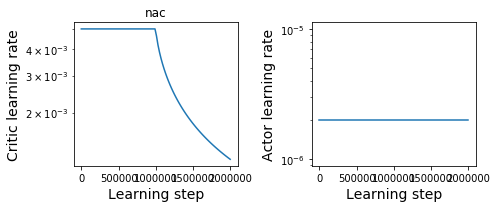

In [222]:
fig, (ax1, ax2) = ut.plot_lr(alg_params)
ax1.set_title(alg_params['alg_type'])
plt.tight_layout()
#plt.savefig('plots/'+system_name+'/'+run_name+'/learning_rates.png', dpi=200)

### Importing the trajectories

In [223]:
v_traj, h = ut.read_2d_traj(data_dir+'/value_traj.txt')
r_traj, head = ut.read_traj(data_dir+'/return_traj.txt')
info_traj, head = ut.read_traj(data_dir+'/env_info_traj.txt')

In [224]:
head

['Prob_forager_death',
 'Prob_recipients_death',
 'Prob_gamma_stop',
 'Av_return_0',
 'Av_return_1']

In [227]:
player = 1 # Player 0 for the forager, >0 for a recipient

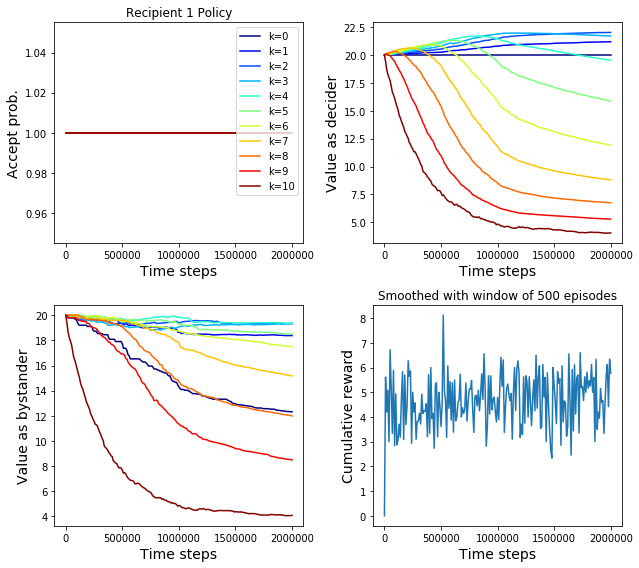

In [228]:
pol_par, h = ut.read_2d_traj(data_dir+'/policy'+str(player)+'_traj.txt')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(9,8))
colors = plt.cm.jet(np.linspace(0,1,int(env_params['max_k'])+1))
xs = np.linspace(0, alg_params['n_steps'], int(alg_params['traj_points']+1))

ax1.set_xlabel('Time steps', fontsize=14)
if player == 0:
    pol_str = 'Gathering'
    pl_str = 'Forager'
else:
    pol_str = 'Accept'
    pl_str = 'Recipient {}'.format(player)
ax1.set_ylabel(pol_str + ' prob.', fontsize=14)
ax1.set_title(pl_str + ' Policy')
for k in range(0,int(env_params['max_k'])+1):
    ax1.plot(xs, [p[k][0] for p in pol_par], c=colors[k], label="k={}".format(k))
ax1.legend()

ax2.set_xlabel('Time steps', fontsize=14)
ax2.set_ylabel('Value as decider', fontsize=14)
for k in range(0,int(env_params['max_k'])+1):
    ax2.plot(xs, np.array(v_traj)[:,player,k], color=colors[k])

ax3.set_xlabel('Time steps', fontsize=14)
ax3.set_ylabel('Value as bystander', fontsize=14)
for k in range(0,int(env_params['max_k'])+1):
    ax3.plot(xs, np.array(v_traj)[:,player,k+int(env_params['max_k'])+1], c=colors[k])

ax4.set_xlabel('Time steps', fontsize=14)
ax4.set_ylabel('Cumulative reward', fontsize=14)
wind_size=500
times, new_traj = ut.smooth_traj(np.array(info_traj, dtype=float)[:,player+3], wind_size)
ax4.set_title('Smoothed with window of {} episodes'.format(wind_size))
ax4.plot(xs, np.array(info_traj,dtype=float)[:,player+3])

plt.tight_layout()
#plt.savefig('plots/'+system_name+'/'+run_name+'/learning_'+str(player)+'.png', dpi=200)

### Time scales

In [229]:
info_traj, h = ut.read_traj(data_dir+'/env_info_traj.txt')
info_traj = np.array(info_traj, dtype=float)

/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


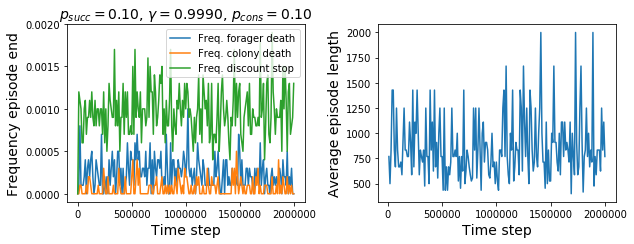

In [230]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(9,3.5))
ax1.set_xlabel('Time step', fontsize=14)
ax1.set_ylabel('Frequency episode end', fontsize=14)
ax1.set_title(r"$p_{succ}=%3.2f$, $\gamma=%5.4f$, $p_{cons}=%3.2f$" %(env_params['p_succ'], alg_params['gamma'], env_params['p_consume']), fontsize=14)
ax1.plot(xs, np.array(info_traj)[:,0], label='Freq. forager death')
ax1.plot(xs, np.array(info_traj)[:,1], label='Freq. colony death')
ax1.plot(xs, np.array(info_traj)[:,2], label='Freq. discount stop')
ax1.legend()

ax2.set_xlabel('Time step', fontsize=14)
ax2.set_ylabel('Average episode length', fontsize=14)
ax2.plot(xs, 1/(np.array(info_traj)[:,0]+np.array(info_traj)[:,1]+np.array(info_traj)[:,2]))

plt.tight_layout()
#plt.savefig('plots/'+system_name+'/'+run_name+'/times.png', dpi=200)

In [18]:
info_traj

[['0', '0', '0', '0', '0'],
 ['0.00113333', '0.00806667', '0.1512', '1.69451', '1.69451'],
 ['0.0104', '0.000933333', '0.145', '3.35949', '3.35949'],
 ['0.0127333', '0', '0.149467', '3.57131', '3.57131'],
 ['0.0135333', '0', '0.144667', '3.69195', '3.69195'],
 ['0.0122667', '0', '0.148733', '3.6236', '3.6236'],
 ['0.0122', '0', '0.150067', '3.5719', '3.5719'],
 ['0.00993333', '0', '0.149867', '3.62078', '3.62078'],
 ['0.00986667', '0', '0.151667', '3.59307', '3.59307'],
 ['0.0110667', '0', '0.147067', '3.6914', '3.6914'],
 ['0.00893333', '0', '0.151267', '3.61964', '3.61964'],
 ['0.00926667', '0', '0.1502', '3.6505', '3.6505'],
 ['0.00893333', '0', '0.1486', '3.69573', '3.69573'],
 ['0.00906667', '0', '0.146533', '3.76478', '3.76478'],
 ['0.00853333', '0', '0.1508', '3.63891', '3.63891'],
 ['0.0084', '0', '0.154133', '3.57711', '3.57711'],
 ['0.00966667', '0', '0.1506', '3.6614', '3.6614'],
 ['0.0082', '0', '0.147733', '3.73365', '3.73365'],
 ['0.0086', '0', '0.149533', '3.70531', '3.7